In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [230]:
## Paths to data tables ##

# Infant mortality 
infant_mortality = "Resources/infant_mortality.csv"

# Maternal mortality
maternal_mortality = "Resources/maternal_mortality.csv"

# Life expectancy
life_expectancy = "Resources/life_expectancy.csv"

# Avoidable mortality
avoidable_mortality = "Resources/avoidable_mortality.csv"

# Heart disease
heart_disease_mortality = "Resources/heart_disease_mortality.csv"

# Health expenditure and financing
expenditure_financing = "Resources/expenditure_financing.csv"

# Percent insured
percent_insured = "Resources/percent_insured.csv"

# Percentage GDP
percent_gdp = "Resources/percent_gdp.csv"

###### Alex's CSV File Pile #######

# Health expenditure by financing scheme
expenditure_by_scheme_updated = "Resources/expenditure_by_scheme_updated.csv"

two_schemes = "Resources/two_schemes.csv"

schemes_on_schemes = "Resources/schemes_on_schemes.csv"


In [179]:
# Read in files using Pandas
life_expectancy_file = pd.read_csv(life_expectancy)
avoidable_mortality_file = pd.read_csv(avoidable_mortality)
infant_mortality_file = pd.read_csv(infant_mortality)
maternal_mortality_file = pd.read_csv(maternal_mortality)
heart_disease_mortality_file = pd.read_csv(heart_disease_mortality)
expenditure_financing_file = pd.read_csv(expenditure_financing)
percent_insured_file = pd.read_csv(percent_insured)
expenditure_by_scheme_file = pd.read_csv(expenditure_by_scheme_updated)
two_schemes_file = pd.read_csv(two_schemes)
percent_gdp_file = pd.read_csv(percent_gdp)


In [181]:
#### Reorganize and rename each data set's columns for purpose of merge and readability ###

# Life expectancy 

life_expectancy_file = life_expectancy_file[["Country", "Year", "Value"]]
life_expectancy_df = life_expectancy_file.rename(columns = {"Value": "Life Expectancy (Years)"})

# Avoidable mortality
avoidable_mortality_file = avoidable_mortality_file[["Country", "Year", "Value"]]
avoidable_mortality_df = avoidable_mortality_file.rename(columns = {"Value": "Avoidable Deaths Per 100,000 Population"})

# Infant mortality 
infant_mortality_file = infant_mortality_file[["Country", "Year", "Value"]]
infant_mortality_df = infant_mortality_file.rename(columns = {"Value": "Infant Mortality (Deaths per 1,000 Live Births)"})

# Maternal mortality
maternal_mortality_file = maternal_mortality_file[["Country", "Year", "Value"]]
maternal_mortality_df = maternal_mortality_file.rename(columns = {"Value": "Maternal Mortality (Deaths per 100,000 Live Births)"})

# Heart disease mortality
heart_disease_mortality_file = heart_disease_mortality_file[["Country", "Year", "Value"]]
heart_disease_mortality_df = heart_disease_mortality_file.rename(columns = {"Value": "Death from Heart Disease per 100,000 Population"})

# Health expenditure per capita
expenditure_financing_file = expenditure_financing_file[["Country", "Year", "Value"]]
expenditure_financing_df = expenditure_financing_file.rename(columns = {"Value": "Health Expenditure Per Capita, Current Prices, Current PPP"})

# Percent of population insured
percent_insured_file = percent_insured_file[["Country", "Year", "Value"]]
percent_insured_df = percent_insured_file.rename(columns = {"Value": "Total Percent of Population with Health Insurance"})

# Percent GDP spent on health over 20 years
percent_gdp_file = percent_gdp_file[["Country", "Year", "Value"]]
percent_gdp_df = percent_gdp_file.rename(columns = {"Value": "Percent of GDP Spent on Health Care"})

# Health expenditure by financing scheme
expenditure_by_scheme_file = expenditure_by_scheme_file[["Country", "Year", "Financing scheme", "Value"]]
expenditure_by_scheme_df = expenditure_by_scheme_file.rename(columns = {"Value": "Health Expenditure by Scheme, Per Capita, Current PPP"})

two_schemes_file = two_schemes_file[["Country", "Year", "Financing scheme", "Value"]]
two_schemes_df = two_schemes_file.rename(columns={"Value": "Percent of Total Health Expenditure"})

In [18]:
## Merge above data tables into one large table
merge1 = pd.merge(life_expectancy_df, avoidable_mortality_df, on=["Country", "Year"], how='outer')
merge2 = pd.merge(merge1, infant_mortality_df, on=["Country", "Year"], how='outer')
merge3 = pd.merge(merge2, maternal_mortality_df, on=["Country", "Year"], how='outer')
merge4 = pd.merge(merge3, heart_disease_mortality_df, on=["Country", "Year"], how='outer')
merge5 = pd.merge(merge4, expenditure_financing_df, on=["Country", "Year"], how='outer')
merge6 = pd.merge(merge5, percent_insured_df, on=["Country", "Year"], how='outer')

# Rename main table
health_spending = merge6

# Show main table
health_spending.head()

,Country,Year,Life Expectancy (Years),"Avoidable Deaths Per 100,000 Population","Infant Mortality (Deaths per 1,000 Live Births)","Maternal Mortality (Deaths per 100,000 Live Births)","Death from Heart Disease per 100,000 Population","Health Expenditure Per Capita, Current Prices, Current PPP",Total Percent of Population with Health Insurance
0,Australia,2018,82.7,151.0,3.1,4.8,175.9,5190.886,100.0
1,Australia,2019,82.9,156.0,3.3,3.9,176.4,5126.653,100.0
2,Australia,2020,83.2,144.0,3.2,2.0,158.6,5692.402,100.0
3,Australia,2021,83.3,144.0,3.3,3.5,164.5,6225.535,100.0
4,Austria,2018,81.8,188.0,2.7,7.1,306.5,5518.538,99.9


In [19]:
#Output CSV document
health_spending.to_csv("Resources/main_table.csv", index_label="Country")

In [20]:
### Stacked bar chart

#Group by country and take the average Health Expenditure Per Capita, Current Prices, Current PPP over four years
health_spending_sorted = health_spending.groupby(["Country"])["Health Expenditure Per Capita, Current Prices, Current PPP"].mean()

# Sort health expenditure from highest to lowest
health_spending_sorted = health_spending_sorted.sort_values(ascending=False)


<Axes: title={'center': 'Health Expenditure by Financing Scheme for the Top 10 Highest Spending Countries in 2018'}, xlabel='Country', ylabel='Health Expenditure Per Capita'>

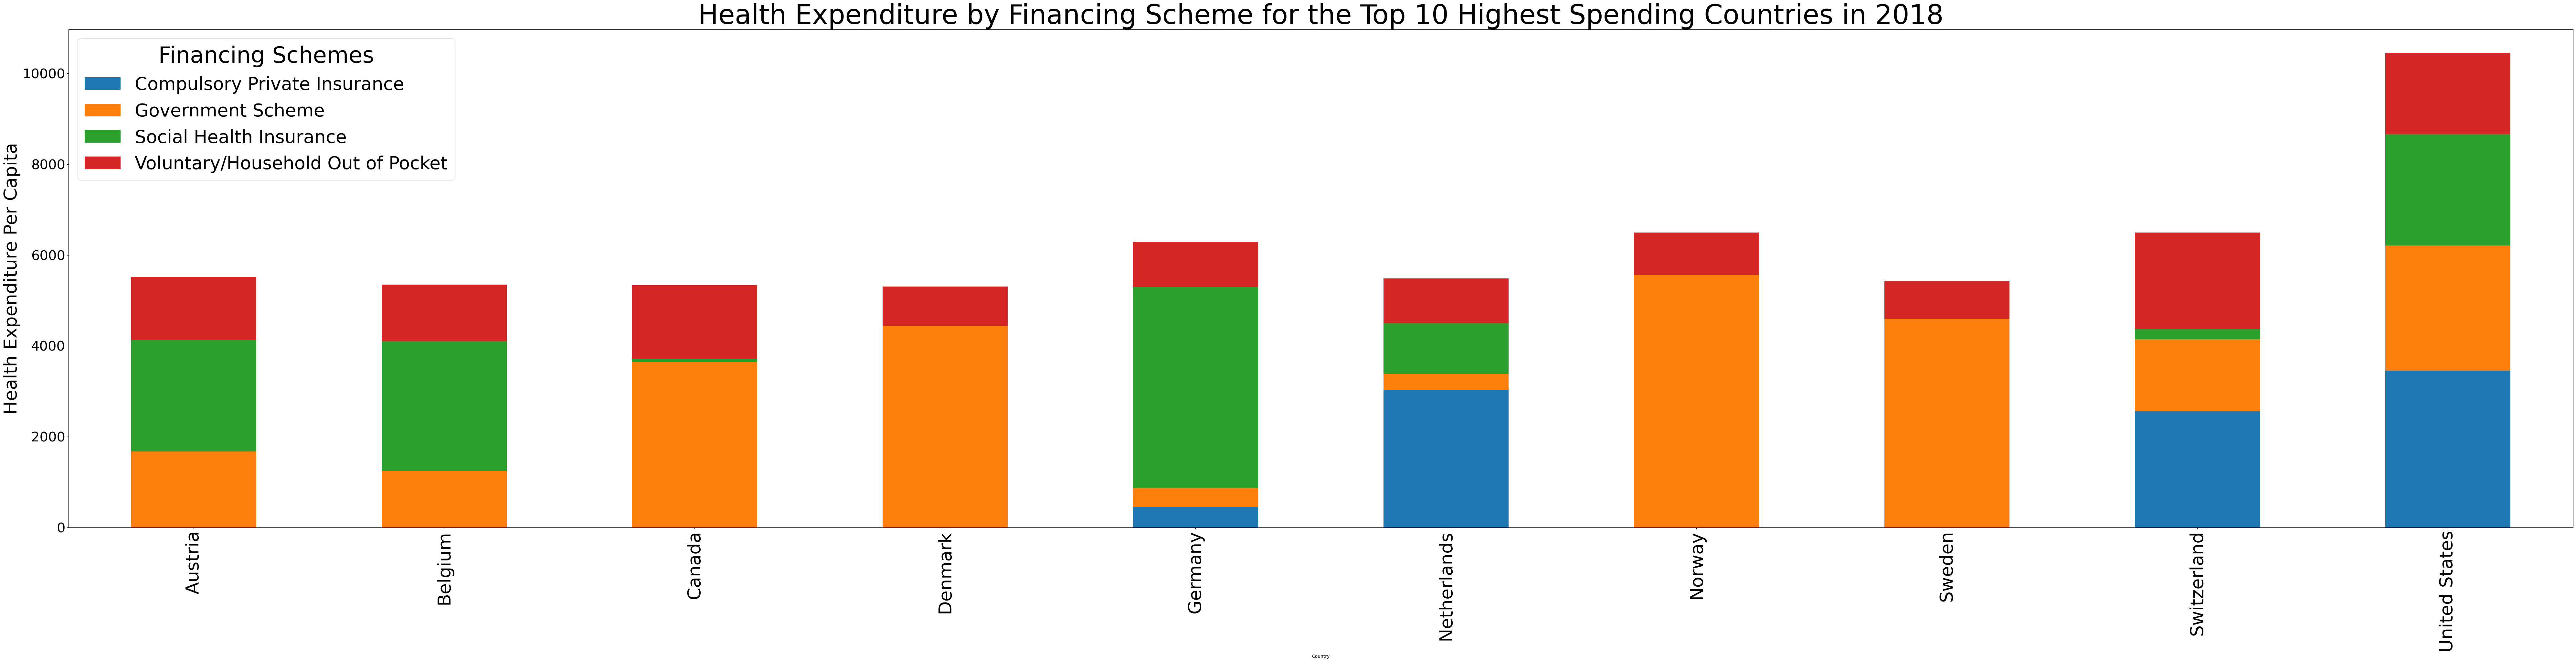

In [116]:
#### Show healthcare spending by financial scheme in the top ten highest health expenditure countries

# Group the financing scheme data frame by country, year, and financing scheme so that we can see all three schemes together for each country to examine total table
scheme_grouped = expenditure_by_scheme_df.groupby(["Country", "Year", "Financing scheme"]).mean()

# Get the total health expenditure per capita to merge into the health expenditure by financing scheme table in order to sort
total_expenditure_2018 = expenditure_financing_df[expenditure_financing_df["Year"] == 2018]

# Show health expenditure by scheme only for the year 2018. 
# This is the most complete year prior to Covid. Elected not to use a covid year as I thought that data would be different than normal years
scheme_2018 = expenditure_by_scheme_df[expenditure_by_scheme_df["Year"] == 2018]

# Merge total health expenditure in 2018 with health expenditure by financing scheme in 2018
scheme_and_total_2018 = pd.merge(scheme_2018, total_expenditure_2018, on=["Country", "Year"], how="outer")

#Eliminate year column for readability
scheme_and_total_2018 = scheme_and_total_2018[["Country","Health Expenditure Per Capita, Current Prices, Current PPP", "Financing scheme", "Health Expenditure by Scheme, Per Capita, Current PPP"]]

# Sort by total health expenditure to identify top 10
scheme_and_total_2018_sorted = scheme_and_total_2018.sort_values(by="Health Expenditure Per Capita, Current Prices, Current PPP", ascending=False)

top_ten = scheme_and_total_2018[scheme_and_total_2018["Health Expenditure Per Capita, Current Prices, Current PPP"] > 5293]

# Get rid of "Financing schemes unknown because it is such a small column"
top_ten = top_ten[top_ten ["Financing scheme"] != "Financing schemes unknown"]

top_ten = top_ten.groupby(["Country", "Health Expenditure Per Capita, Current Prices, Current PPP", "Financing scheme"]).mean()

pivot = pd.pivot_table(data=top_ten, index=["Country"], columns=["Financing scheme"], values=["Health Expenditure by Scheme, Per Capita, Current PPP"])
ax = pivot.plot.bar(stacked=True, figsize=(100,20))
ax.tick_params(axis = 'x', labelsize=40)
ax.tick_params(axis = 'y', labelsize=30)
legend_labels = ["Compulsory Private Insurance", "Government Scheme", "Social Health Insurance", "Voluntary/Household Out of Pocket"]
ax.legend(legend_labels, title="Financing Schemes", title_fontsize=50, fontsize=40)
ax.set_ylabel("Health Expenditure Per Capita", fontsize=40)
ax.set_title("Health Expenditure by Financing Scheme for the Top 10 Highest Spending Countries in 2018", fontsize = 60)

display(ax)

plt.savefig("Output/health_expenditure_by_scheme_2018.png", bbox_inches="tight")

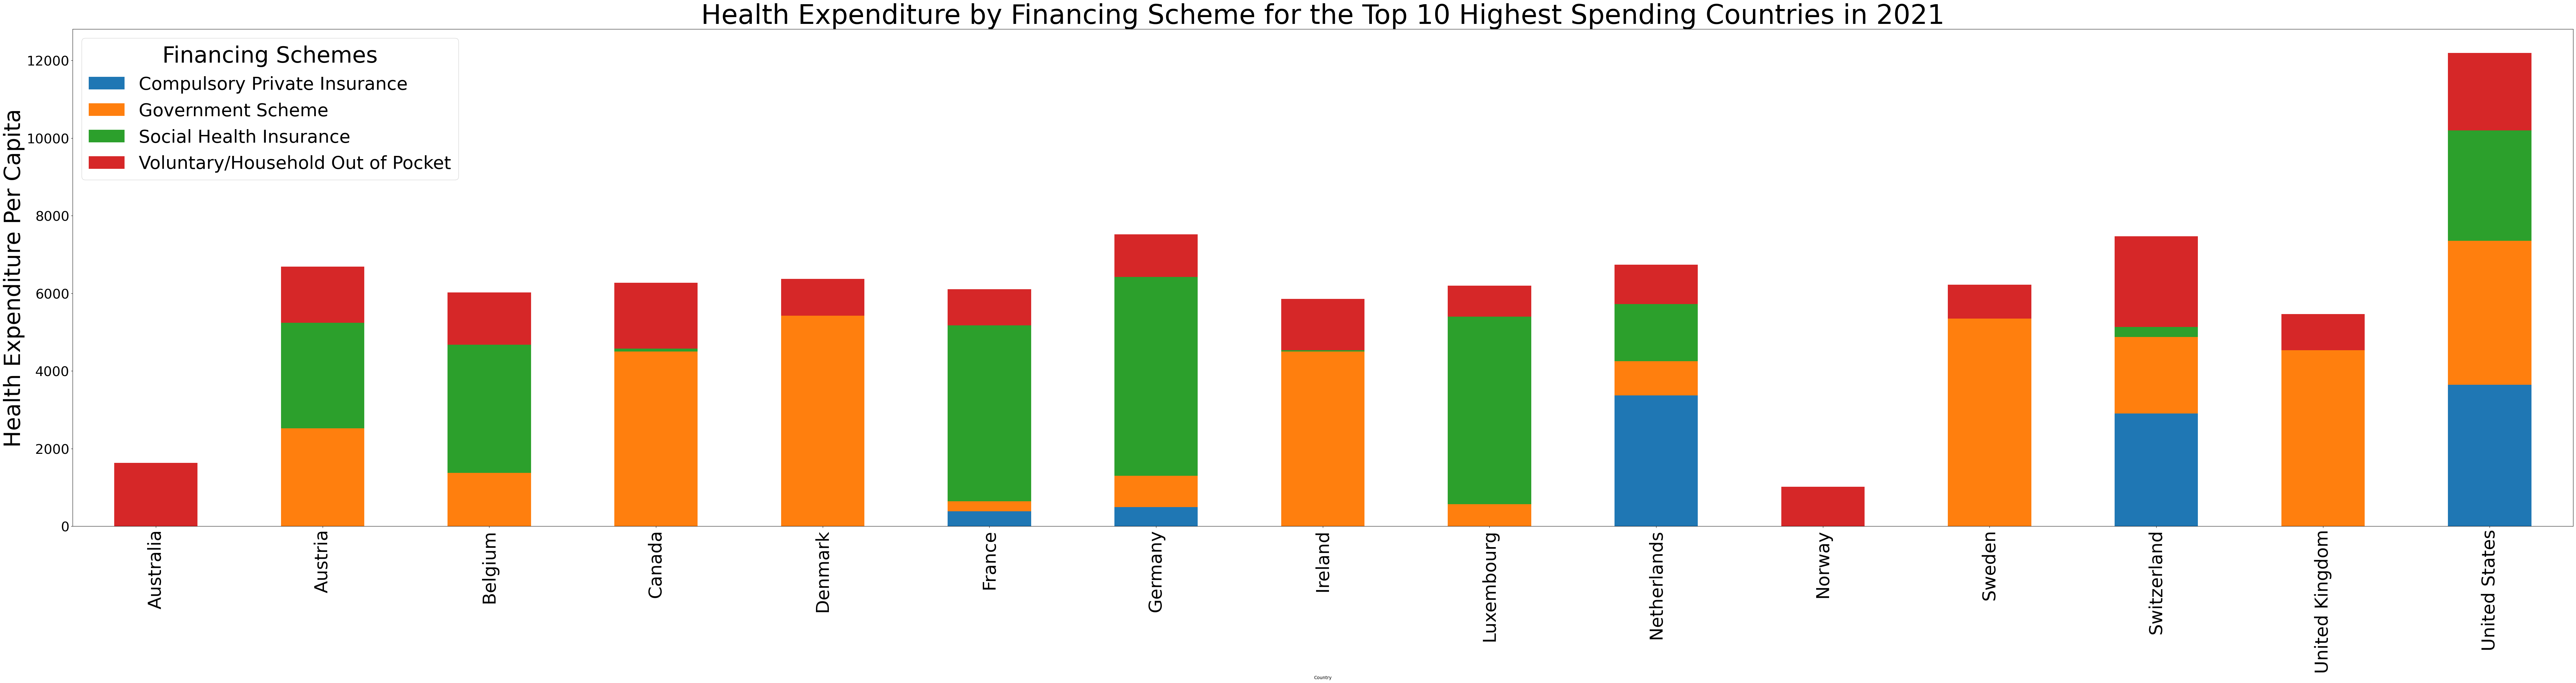

In [216]:
#### Don't use this chart because it has incomplete data ####

# Get the total health expenditure per capita to merge into the health expenditure by financing scheme table in order to sort
total_expenditure_2021 = expenditure_financing_df[expenditure_financing_df["Year"] == 2021]

# Show health expenditure by scheme only for the year 2018. 
# This is the most complete year prior to Covid. Elected not to use a covid year as I thought that data would be different than normal years
scheme_2021 = expenditure_by_scheme_df[expenditure_by_scheme_df["Year"] == 2021]

# Merge total health expenditure in 2021 with health expenditure by financing scheme in 2021
scheme_and_total_2021 = pd.merge(scheme_2021, total_expenditure_2021, on=["Country", "Year"], how="outer")

#Eliminate year column for readability
scheme_and_total_2021 = scheme_and_total_2021[["Country","Health Expenditure Per Capita, Current Prices, Current PPP", "Financing scheme", "Health Expenditure by Scheme, Per Capita, Current PPP"]]

scheme_and_total_grouped = scheme_and_total_2021.groupby(["Country", "Health Expenditure Per Capita, Current Prices, Current PPP", "Financing scheme"]).mean()
scheme_and_total_sorted = scheme_and_total_grouped.sort_values(by="Health Expenditure Per Capita, Current Prices, Current PPP", ascending=False)

top_ten = scheme_and_total_2021[scheme_and_total_2021["Health Expenditure Per Capita, Current Prices, Current PPP"] > 5293]

top_ten = top_ten[(top_ten["Financing scheme"] != "Financing schemes unknown") & (top_ten["Financing scheme"] != "Rest of the world financing schemes (non-resident)")] 

top_ten = top_ten.groupby(["Country", "Health Expenditure Per Capita, Current Prices, Current PPP", "Financing scheme"]).mean()

pivot = pd.pivot_table(data=top_ten, index=["Country"], columns=["Financing scheme"], values=["Health Expenditure by Scheme, Per Capita, Current PPP"])
ax = pivot.plot.bar(stacked=True, figsize=(100,20))
ax.tick_params(axis = 'x', labelsize=40)
ax.tick_params(axis = 'y', labelsize=30)
legend_labels = ["Compulsory Private Insurance", "Government Scheme", "Social Health Insurance", "Voluntary/Household Out of Pocket"]
ax.legend(legend_labels, title="Financing Schemes", title_fontsize=50, fontsize=40)
ax.set_ylabel("Health Expenditure Per Capita", fontsize=50)
ax.set_title("Health Expenditure by Financing Scheme for the Top 10 Highest Spending Countries in 2021", fontsize = 60)


plt.savefig("Output/health_expenditure_by_scheme_2018.png", bbox_inches="tight")

In [215]:
#### Show healthcare spending by financial scheme across all countries

# Merge total health expenditure df with health expenditure by financing scheme df
total_and_scheme_merge = pd.merge(expenditure_financing_df, expenditure_by_scheme_df, on=["Country", "Year"], how="outer")

#Drop NaN columns so I can analyze health expenditure 



In [214]:
#two_schemes_grouped = two_schemes_df.groupby(["Country", "Financing scheme"]).mean(["Percent of Total Health Expenditure"])
two_schemes_less_year = two_schemes_df[["Country", "Financing scheme", "Percent of Total Health Expenditure"]]
two_schemes_grouped = two_schemes_less_year.groupby(["Country", "Financing scheme"]).mean()

In [229]:
#### Stacked bar chart with government schemes or private schemes

two_schemes_unstacked = two_schemes_grouped.unstack("Financing scheme").reset_index()

# Eliminate Croatia because Croatia data add up to more than 100
two_schemes_unstacked = two_schemes_unstacked[two_schemes_unstacked["Country"] != "Croatia"]

two_schemes_chart = two_schemes_unstacked.plot.bar(x="Country", stacked=True, figsize=(150,50))
two_schemes_chart.tick_params(axis='x', labelsize=50)
two_schemes_chart.tick_params(axis='y', labelsize=50)
two_schemes_chart.set_title("Percent of Total Health Expenditure by Financing Scheme", fontsize=70)
two_schemes_chart.legend(title="Financing Schemes", fontsize=70, loc="lower left")
